In [1]:
# зависимости
import urllib.request as req, json, numpy as np, datetime
import matplotlib.pyplot as plt
# источник - прожиточный минимум
apikey = "... ваш ключ ..."
req_template = "https://apidata.mos.ru/v1/{}/?api_key={}"
incomes = [row["Cells"] for row in json.loads(req.urlopen(req_template.format("datasets/1982/rows", apikey)).read())]
# источник - курс рублей за доллах
dollar_url = "http://export.finam.ru/USDCB_070101_170901.txt?market=41&em=82485&code=USDCB&apply=0&df=1&mf=0&yf=2007&from=01.01.2007&dt=1&mt=8&yt=2017&to=01.09.2017&p=10&f=USDCB_070101_170901&e=.txt&cn=USDCB&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=4&sep2=2&datf=12"
lines = req.urlopen(dollar_url).read().decode("utf-8").strip().split('\n')
dollars = dict((x.split('\t')[0], float(x.split('\t')[4])) for x in lines)

In [2]:
def strToDate(str):
    parts = str.split()
    m = {"I": "0301", "II": "0601", "III": "0901", "IV": "1201"}
    return parts[0] + m[parts[2]]

def strToDays(str):
    y, m, d = int(str[:4]), int(str[4:6]), int(str[6:])
    return (datetime.datetime(y, m, d) - datetime.datetime(2007,3,1)).total_seconds() / 60 / 60 / 24

data = [
    [strToDays(strToDate(row["Quarter"])), dollars[strToDate(row["Quarter"])], row["AveragePerCapita"]]
    for row in incomes
]

M = np.matrix([[*row[:-1], 1.0] for row in data])
y = np.matrix([row[-1:] for row in data])
x = (M.T * M).I * M.T * y
print("минимум = {:.2f}*(год-2007) + {:.2f}*[₽/$] + {:.2f}".format(*x.flatten().A[0]))
#предсказания
predict = M * x

минимум = 2.13*(год-2007) + 70.36*[₽/$] + 3632.47


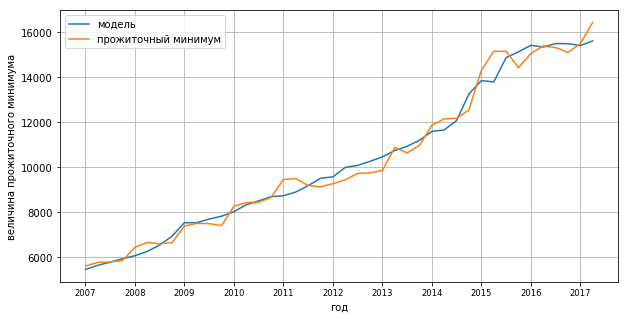

In [3]:
plt.figure(figsize=(10,5))
plt.plot(predict,label="модель")
plt.plot(y,label="прожиточный минимум")
plt.legend()
plt.xticks(range(0,len(data), 4), range(2007, 2018), size='small')
plt.grid(True)
plt.xlabel('год')
plt.ylabel('величина прожиточного минимума')
plt.show()